# 4. Travel times

This first notebook allows to download all necessary data and metadata for the tutorial. This allows the user to get ready with their own data in order to later use the tutorial to analyze their own data.

Note that this tutorial uses `Path` objects to handle file paths. This is a very convenient way to handle file paths in Python. If you are not familiar with `Path` objects, you can read the [official `pathlib` documentation](https://docs.python.org/3/library/pathlib.html). Also note that the velocity model is stored as a `h5` file, which is a binary file format but not mandatory and implies the use of the `h5py` library. If you are not familiar with `h5` files, you can read the [h5py documentation](https://docs.h5py.org/en/stable/).

In [1]:
from pathlib import Path

import h5py as h5
import numpy as np
import obspy

import covseisnet as csn

## Read the velocity model of the Piton de la Fournaise volcano

We use the 3D velocity model of the Piton de la Fournaise volcano (Morder et al. 2014), accessible in the supplementary material. We first turn the grid into a `h5` file and read it here before filling a regular 3D grid. The model can be displyaed with the `grid3d` function of the `covseisnet.plot` function. 

> Mordret, A., Rivet, D., Landès, M., & Shapiro, N. M. (2015). Three‐dimensional shear velocity anisotropic model of Piton de la Fournaise Volcano (La Réunion Island) from ambient seismic noise. Journal of Geophysical Research: Solid Earth, 120(1), 406-427.

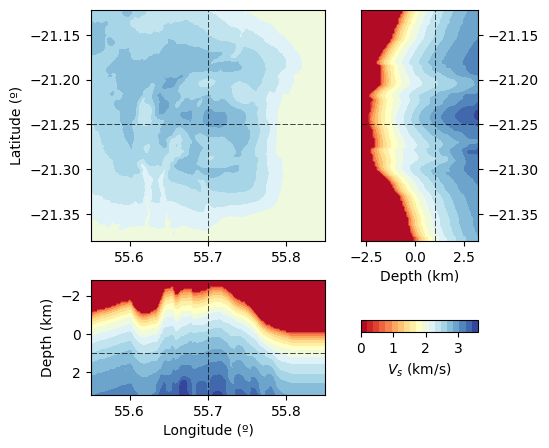

In [5]:
# Read the model
filepath_model = Path("../data/undervolc_vs_mordret_2015.h5").absolute()
velocity_field_name = "Vs"

# The h5 file contains the velocity model in a 3D grid with the following
# dimensions in order: longitude, latitude, depth. The depth and velocity are
# in meters and meters per second, respectively.
with h5.File(filepath_model, "r") as velocity_model:

    # Coordinates
    lon = np.array(velocity_model["longitude"])
    lat = np.array(velocity_model["latitude"])
    depth = np.array(velocity_model["depth"])

    # Velocity
    velocity = np.array(velocity_model[velocity_field_name])

# Get extent
model = csn.velocity.model_from_grid(lon, lat, depth, velocity)

# Plot the grid
fig, ax = csn.plot.grid3d(model, profile_coordinates=[55.7, -21.25, 1], cmap="RdYlBu", label="$V_s$ (km/s)")

Using Pykonal to calculate travel times.


/home/eric/WORK/software/covseisnet/covseisnet/travel_times.py:224: RuntimeWarning: divide by zero encountered in scalar divide
  solver.solve()


TravelTimes(
	lon: [55.55, 55.85] with 151 points
	lat: [-21.38, -21.12] with 130 points
	depth: [-2.80, 3.20] with 61 points
	mesh: 1,197,430 points
	nan values: 0 points
	min: 0.432
	max: inf
)
TravelTimes(
	lon: [55.55, 55.85] with 151 points
	lat: [-21.38, -21.12] with 130 points
	depth: [-2.80, 3.20] with 61 points
	mesh: 1,197,430 points
	nan values: 372,659 points
	min: 0.432
	max: 11.604
)


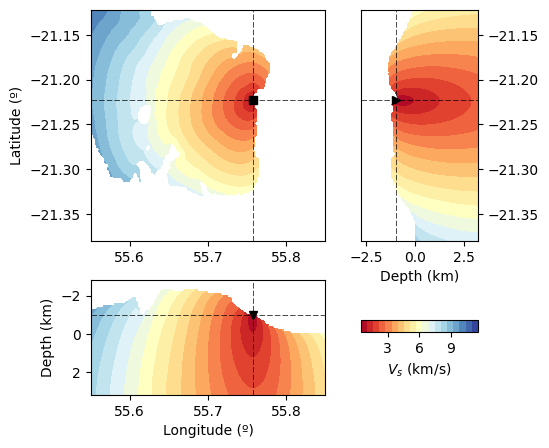

In [6]:
stream = csn.read("../data/undervolc.mseed")
stream.assign_coordinates("../data/undervolc.xml")
longitudes = [tr.stats.coordinates.longitude for tr in stream]
latitudes = [tr.stats.coordinates.latitude for tr in stream]
depths = [-tr.stats.coordinates.elevation * 1e-3 for tr in stream]
travel_times = csn.travel_times.TravelTimes(model, receiver_coordinates=(longitudes[2], latitudes[2], depths[2]))
print(travel_times)

travel_times[np.isinf(travel_times)] = np.nan
print(travel_times)

fig, ax = csn.plot.grid3d(
    travel_times,
    receiver_coordinates=(longitudes[2], latitudes[2], depths[2]),
    cmap="RdYlBu",
    label="$V_s$ (km/s)",
)